# Homework 1
## Vincent Wilmet b00785879

In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import statsmodels.formula.api as sm1
import statsmodels.regression.linear_model as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-gdp/life_gdp.csv
/kaggle/input/econometrics-hw1/APM_Returns.csv
/kaggle/input/appl-russel/Appl_Russell.csv


In [147]:
df = pd.read_csv("/kaggle/input/econometrics-hw1/APM_Returns.csv")
df.head()

,Unnamed: 0,Date,Mkt-RF,SMB,HML,RMW,CMA...6,MMM,ABT,ATVI,...,HCN,WDC,WY,WHR,WMB,XEL,XRX,XLNX,XL,YUM
0,1,2000/01,-4.74,4.15,-0.29,-6.05,4.73,-1.20,-7.37,-5.35,...,4.47,20.22,-18.30,-6.17,22.37,0.91,-14.11,-2.55,-12.09,-23.69
1,2,2000/02,2.45,18.32,-9.93,-18.33,-0.51,-6.24,0.91,-19.23,...,-3.92,-5.69,-11.00,-7.19,9.42,-9.20,3.76,73.89,-11.31,-7.42
2,3,2000/03,5.20,-14.91,7.38,11.68,-1.05,-0.04,6.16,-5.40,...,-10.51,64.81,10.61,7.47,4.61,12.70,19.07,3.37,36.47,16.20
3,4,2000/04,-6.40,-5.55,8.61,7.55,5.27,-2.65,8.78,-48.65,...,13.38,-8.02,-6.82,10.63,-15.11,9.29,1.46,-12.01,-14.46,8.59
4,5,2000/05,-4.42,-3.68,2.56,4.63,0.74,-1.51,5.35,-1.50,...,0.28,-32.32,-7.53,-13.46,10.33,0.93,1.86,3.42,24.43,-13.97


# Summary Statistics

### Question 1

In [148]:
q1_df = pd.DataFrame(np.zeros((384,3)), 
                     columns=["col name", "mean", "std"])
j = 0
for col in df.columns[7:]:
    q1_df["col name"][j] = col
    q1_df["mean"][j] = float(np.mean(df[col]))
    q1_df["std"][j] = float(np.std(df[col]))
    j += 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


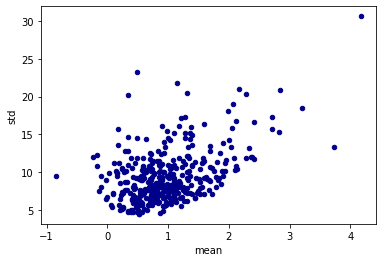

In [149]:
ax1 = q1_df.plot.scatter(x='mean',
                      y='std',
                      c='DarkBlue')

### Q2

In [150]:
q1_df

,col name,mean,std
0,MMM,0.734286,5.648290
1,ABT,0.572381,5.700569
2,ATVI,2.379476,12.030431
3,ADBE,1.569095,11.914072
4,AES,0.488429,14.546753
...,...,...,...
379,XEL,0.594095,7.100333
380,XRX,0.286000,12.812700
381,XLNX,0.708381,11.746514
382,XL,0.480524,11.804748


In [151]:
results = sm1.ols('std ~ mean', data=q1_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    std   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.47e-22
Time:                        22:13:37   Log-Likelihood:                -974.40
No. Observations:                 384   AIC:                             1953.
Df Residuals:                     382   BIC:                             1961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8113      0.292     23.303      0.0

the values for $\hat{\beta_1}$ = 6.8113 and $\hat{\beta_2}$ = 2.6492

### Q3

the coefficient $\hat{\beta_2}$ serves as the slope of our best fit line. it tells us (after having added the intercept) how much times the mean of a value we would need to get to its std, aka the relationship between the two variables 

### Q4

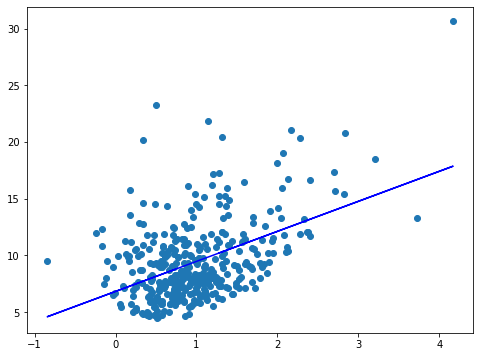

In [152]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(q1_df["mean"], q1_df["std"], 'o', label="Data")
ax.plot(q1_df["mean"], results.fittedvalues, 'b-', label="True")

### Q5

\begin{align} 
\hat{\beta}_{2} = \frac{\sum_{i=1}^{384}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{384}(x_{i}-\bar{x})^{2}} \\ 
and \\
\hat{\beta}_{1} = \bar{y} - \hat{\beta}_{2}\bar{x} + \epsilon_i\\
std_i = \hat{\beta_1} + \hat{\beta_2}ave_i + \epsilon_i \\
std_i = 6.8113 + 2.6492 ave_i + \epsilon_i 
\end{align}

### Q6

\begin{align}
H_{0}: \beta_2 = 0 \\
H_{1}: \beta_2 \neq 0
\end{align}

In [153]:
print(results.t_test([[0, 1]]), results.pvalues)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             2.6492      0.256     10.361      0.000       2.146       3.152
============================================================================== Intercept    2.321053e-75
mean         2.470627e-22
dtype: float64


The p value = 0.0000....2, which is strongly statistically significant 

# Linear regression: Mathematical framework

In [154]:
df2 = pd.read_csv('/kaggle/input/life-gdp/life_gdp.csv')
df2.rename(columns = {'Life exp.':'life_exp'}, inplace = True)
df2

,life_exp,GDPpcap
1,64.047,1.758466
2,78.495,11.803284
3,76.293,13.876295
4,61.809,6.044972
5,76.519,22.855748
...,...,...
178,76.454,6.233485
179,73.646,4.651724
180,65.157,2.404422
181,62.255,3.717667


### Q1

In [155]:
res = sm1.ols('life_exp ~ GDPpcap', data = df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.47e-24
Time:                        22:13:38   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.5137      0.585    115.478      0.0

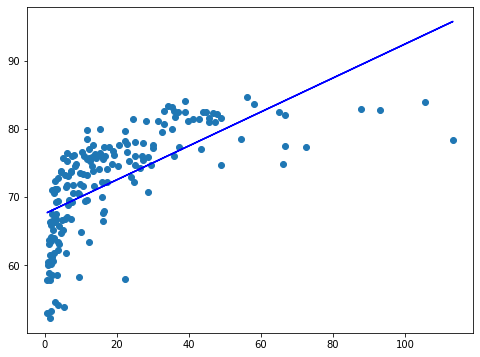

In [156]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df2["GDPpcap"], df2["life_exp"],  'o', label="Data")
ax.plot(df2["GDPpcap"], res.fittedvalues, 'b-', label="True")

### Q2

In [157]:
df2_log = df2
df2_log['life_exp'] = df2['life_exp']
df2_log['GDPpcap'] = np.log(df2['GDPpcap'])
df2_log

,life_exp,GDPpcap
1,64.047,0.564442
2,78.495,2.468378
3,76.293,2.630182
4,61.809,1.799227
5,76.519,3.129203
...,...,...
178,76.454,1.829936
179,73.646,1.537238
180,65.157,0.877310
181,62.255,1.313096


In [158]:
res_log = sm1.ols('life_exp ~ GDPpcap', data = df2_log).fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.00e-46
Time:                        22:13:38   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6593      0.722     82.628      0.0

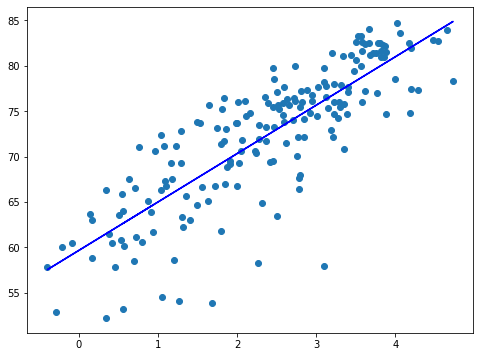

In [159]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(df2_log["GDPpcap"], df2_log["life_exp"], 'o', label="Data")
ax.plot(df2_log["GDPpcap"], res_log.fittedvalues, 'b-', label="True")

### Q3

The coefficient of determination, or $R^2$ of the non log transformed regression is 0.442, wheras the log transformed regression is much higher at 0.68. This is given in our OLS summary statistics. 

Yes we can compare these coefficients, where What we can conclude from this is that the non log transformed data follows an expenential distribution. By log transforming it, we can reduce the spread of data. 

### Q4
the relationship of the coefficients of determination can be seen through the square root of $R^2$ calculated above, and the one calculated by numpy. Shown below, we can see that the relationship is nearly identical for the first 14 decimal places, thus we can declare the variables practically identical.

In [160]:
COD = np.sqrt(res_log.rsquared)
np_COD = np.corrcoef(df2_log['life_exp'], df2_log['GDPpcap'])
np_COD

array([[1.        , 0.82471552],
       [0.82471552, 1.        ]])

In [161]:
print("Manual calculation: ", COD, "\nNumpy:", np_COD[1][0] )

Manual calculation:  0.8247155249526711 
Numpy: 0.8247155249526705


# Generating Spurious Correlation

### Q1

In [162]:
df3 = pd.read_csv("/kaggle/input/appl-russel/Appl_Russell.csv")
df3.rename(columns = {"Russell returns": "Russell_returns", "Apple returns": "Apple_returns"}, inplace = True)

In [163]:
explanatory_variables = dict()
y = df3["Apple_returns"].to_numpy().reshape(-1,1)
T = len(y)
names = dict()


for i in range(1000):
    explanatory_variables['Variable_%d'%(i+1)] = np.random.normal(0,1, len(df3['Apple_returns']))
x = pd.DataFrame(explanatory_variables) 

# .T

# new_names = ["col_%d"%i for i in range(262)]
# for i in range(len(new_names)):
#     names[i] = new_names[i]

# x = x.rename(columns = names)

print(x, "\n \n", y[260:])

     Variable_1  Variable_2  Variable_3  Variable_4  Variable_5  Variable_6  \
0      0.353606   -0.612078   -0.714049   -2.191828    0.042665    0.910592   
1     -0.964702    0.738713    1.085656    1.877749    0.957856    1.648871   
2      0.341126   -0.225958   -2.939914    0.395677   -0.079541   -2.075110   
3     -1.772487   -2.422796    0.506816    0.561728    0.466230    0.819793   
4     -0.720693   -3.260667   -1.023120   -0.168830   -0.316493   -0.942903   
..          ...         ...         ...         ...         ...         ...   
257   -0.342023   -0.255350   -0.152390   -0.434013   -1.056079   -0.334588   
258   -0.317296   -0.952149    1.235847    0.238467   -0.658549    0.658850   
259   -0.177743    0.613413   -1.619462    1.314281    0.459301    1.125627   
260    0.590660    1.445510   -0.712133   -1.797873    0.945789    2.159808   
261    0.095763    0.133936   -1.174920    0.595944   -0.992780    1.291473   

     Variable_7  Variable_8  Variable_9  Variable_1

In [164]:
lr = LinearRegression(fit_intercept = True)
beta_values = list()
intercepts = list()
predictions = dict()

for i, col in zip(range(1000), x.columns):
    X = x[col].to_numpy().reshape(-1,1)
    lr.fit(X,y)
    intercepts.append(lr.intercept_[0])
    beta_values.append(lr.coef_[0][0])
    
    predictions['Estimate_%d'%(i+1)] = lr.predict(X)
print(intercepts[995:], "\n \n \n", beta_values[995:])

[0.6192186139846327, 0.6460290266127975, 0.646607589305411, 0.6401428738067388, 0.6468940995162225] 
 
 
 [-0.22295569356786113, 0.22468986169037386, 0.1493289959982983, -0.10397859834261197, -0.41249025960042407]


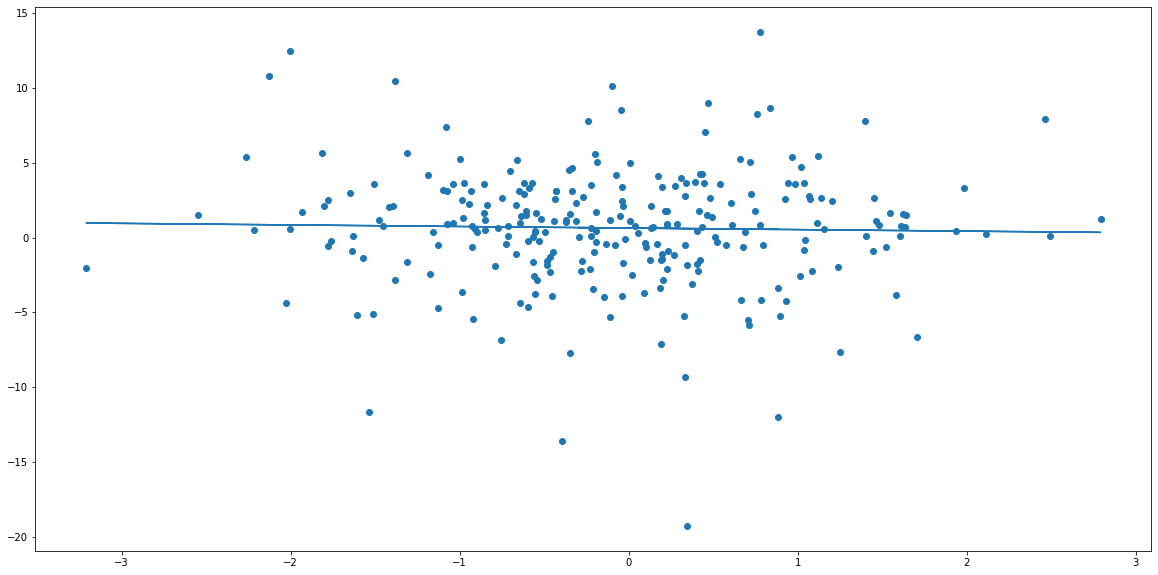

In [165]:
plt.figure(figsize = (20, 10))
plt.scatter(x['Variable_999'], y)
plt.plot(x['Variable_999'],predictions['Estimate_999'])

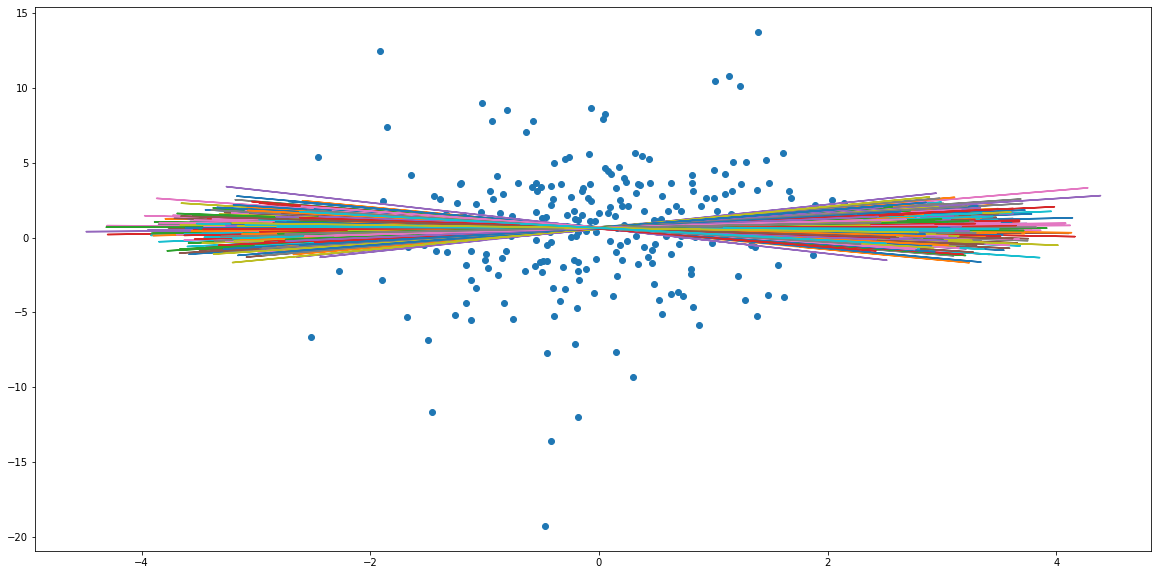

In [166]:
plt.figure(figsize = (20, 10))
plt.scatter(x['Variable_231'], y)
for i in range(1000):
    plt.plot(x['Variable_%d'%(i+1)],predictions['Estimate_%d'%(i+1)])

### Q2

\begin{align}
H_{0}: \beta_2 = 0 \\
H_{1}: \beta_2 \neq 0
\end{align}

In [167]:
def OLS_computation(y,X):
    K = np.size(X,1)
    T = np.size(y)
    XprimeX=np.matmul(np.transpose(X),X)
    XprimeXinv=np.linalg.inv(XprimeX)
    beta_ols=np.matmul(XprimeXinv,np.matmul(np.transpose(X),y))
    epsi = y - np.matmul(X,beta_ols)
    sigma_hat = sum(epsi**2)/(T-K)
    beta_var = np.diag(sigma_hat*XprimeXinv)
    t_stat = np.divide(np.transpose(beta_ols),np.sqrt(beta_var))
    p_val = 2*(1-stats.t.cdf(np.abs(t_stat),T-K))
    data_frame =pd.DataFrame(np.transpose(np.vstack(((np.transpose(beta_ols),np.sqrt(beta_var),t_stat,p_val)))),columns=["Estimate","Std.Error","t_value","Pr(>|t|)"])
    return data_frame

In [168]:
print(OLS_computation(y,X))

   Estimate  Std.Error   t_value  Pr(>|t|)
0 -0.417237   0.240155 -1.737365  0.083502


In [169]:
results1 = sm.OLS(y, X).fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.008
Method:                 Least Squares   F-statistic:                              3.018
Date:                Fri, 28 May 2021   Prob (F-statistic):                      0.0835
Time:                        22:13:41   Log-Likelihood:                         -732.95
No. Observations:                 262   AIC:                                      1468.
Df Residuals:                     261   BIC:                                      1471.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [170]:
tlist = list()
alpha = 0.05
Z_crit = stats.norm.ppf(1-alpha/2)

for i in range(len(beta_values)):
    Z_stat = abs((beta_values[i]-1))/(np.std(beta_values))
    p_val = 2*(1-stats.norm.cdf(Z_stat))
    tlist.append(p_val)
print(max(tlist))

0.37837841504296343


Text(0, 0.5, 'beta2 value')

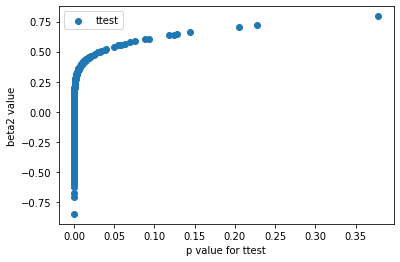

In [171]:
plt.scatter(tlist, beta_values)
plt.legend(['ttest'])
plt.xlabel('p value for ttest')
plt.ylabel('beta2 value')

### Q3
p value calculated by OLS is 0.084, which is higher than our significance level $\alpha$ = 0.05, so we fail to reject the null hypothesis. The same applies to our highest t-test pvalue result: 0.378. 